<a href="https://colab.research.google.com/github/mkh2097/CI_Polynomial_Regression_Algorithm/blob/main/HW1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [ ]:
#training function 
def train(x, t, alpha, epoches, order):

  w = np.zeros(order+1, dtype=float)

  for i in range(epoches):
    w = update(x, t, w, alpha, order) 

  y = calc_result(x, w)
  final_cost = cost(x, t, w, y)
  

  return y, final_cost, w

In [ ]:
#calculate polynomial equation (w: weights in decreasing order, x: inputs)
def calc_result(x, w):
  return np.polyval(w, x)

In [ ]:
#cost function
def cost(x, t, w, y):
  error = y - t
  error_power = np.power(error,2)
  cost = 1 / (2 * float(len(x))) * np.sum(error_power)  
  return cost 

In [ ]:
#update weights
def update(x, t, w, alpha, order):
  y = calc_result(x, w)
  error = y - t
  for i in range(0,order+1):
    w[order-i] += (-alpha/float(len(x))) * np.dot(error,np.power(x,i))
  return w

In [ ]:
#normalization with specific domain
def normalize_custom(arr, min, max):
    return (arr - min) / float(max - min)

In [ ]:
#general normalization
def normalize(arr):
  min = np.amin(arr)
  max = np.amax(arr)
  return (arr - min) / float(max - min)

In [ ]:
#denormalization
def denormalize(arr, min, max):
  return arr * (max - min) + min

In [ ]:
#draw cost function (Continuous)
def draw_cost(costs, costs_validate):

  fig, axs = plt.subplots(1, 1)
  
  costs_x = normalize(np.arange(len(costs)))

  costs_validate_x = normalize(np.arange(len(costs_validate)))

  axs.plot(costs_x, costs,color = "red", label = "train_cost")
  axs.plot(costs_validate_x, costs_validate, color = "blue", label = "validate_cost")
  axs.set_title("Costs Functions")

  fig.set_size_inches(16, 8)
  axs.legend(loc="upper left") 

In [ ]:
#draw (Normalize && Continuous) || (DeNormalize && Continuous) || (Normalize && Discrete) || (DeNormalize && Discrete)
def draw(x, t, w, y, x_denormal, t_denormal, t_min, t_max):


  print(best_polynomial(w))

  fig, axs = plt.subplots(4, 1)
  
  #1

  y_plot_nc, t_plot_nc, x_plot_nc = magic_sort(x, t, y)


  axs[0].plot(x_plot_nc, t_plot_nc, label = "actual")
  axs[0].plot(x_plot_nc, y_plot_nc, label = "predicted")
  axs[0].set_title("Normalize & Continuos")

  #3
  axs[1].plot(x, t, '*', color='green', label = "actual")
  axs[1].plot(x, y,'*', color='red', label = "predicted")
  axs[1].set_title("Normalize & Discrete")
  
  #2
  x_plot_dc = np.arange(len(x))
  y_plot_dc, t_plot_dc = denormalize(y_plot_nc, t_min, t_max), denormalize(t_plot_nc, t_min, t_max)

  axs[2].plot(x_plot_dc, t_plot_dc, label = "actual")
  axs[2].plot(x_plot_dc, y_plot_dc, label = "predicted")
  axs[2].set_title("DeNormalize & Continuos")

  #4
  y_dd = denormalize(y, t_min, t_max)
  axs[3].plot(x_denormal, t_denormal, '*', color='green', label = "actual")
  axs[3].plot(x_denormal, y_dd, '*', color='red', label = "predicted")
  axs[3].set_title("DeNormalize & Discrete")

  fig.set_size_inches(16, 16)
  for i in range(4): 
    axs[i].legend(loc="upper left") 

In [ ]:
#best order polynomial equation
def best_polynomial(w):
  return np.poly1d(w)

In [ ]:
#Resort shuffled arrays for continuous drawing
def magic_sort(x, t, y):

  xy = np.vstack((x, y)).T
  xt = np.vstack((x, t)).T

  xy = xy[np.argsort(xy[:, 0])].T
  xt = xt[np.argsort(xt[:, 0])].T

  return xy[1], xt[1] ,xt[0]


In [ ]:
#prdedic in specific day
def predict(day, x_min, x_max, w, t_min, t_max):
  day = normalize_custom(day, x_min, x_max)

  return int(denormalize(calc_result(day, w), t_min, t_max))

In [ ]:
#draw predict graph (Continuous)
def predict_graph(day, x,w, t, x_min, x_max, t_min, t_max):

  fig, axs = plt.subplots(1, 1)

  x_plot_predict = np.arange(day)
  x_plot_predict_normalized = normalize_custom(x_plot_predict, x_min, x_max)
  y_plot = denormalize(calc_result(x_plot_predict_normalized, w), t_min, t_max)

  x_plot_actual = np.arange(len(x))
  _, t_plot, _ = magic_sort(x, t, t)
  t_plot = denormalize(t_plot, t_min, t_max)

  axs.plot(x_plot_actual, t_plot, label = "actual")
  axs.plot(x_plot_predict, y_plot, label = "predicted")
  title = str(day)+" days" if day != 1 else str(day)+" day"
  axs.set_title(title)
  
  fig.set_size_inches(16, 8)
  axs.legend(loc="upper left") 

In [ ]:
def prepare():
  csv_file_name = 'WHO-COVID-19-Iran-data.csv'
  column_name = ' New_cases'
  csv_file = pd.read_csv(csv_file_name)
  column = csv_file[column_name]
  new_cases_data = column.values

  t = new_cases_data
  x = np.arange(len(new_cases_data))

  #save states before separating && normalize data
  x_min = np.amin(x)
  x_max = np.amax(x)

  t_min = np.amin(t)
  t_max = np.amax(t)


  # #start normalizing before separating
  # x = normalize(x)
  # t = normalize(t)

  #Randomly choose train and validation data
  tx = np.vstack((x,t)).T
  np.random.shuffle(tx)

  train, validate = np.split(tx, [ int(len(tx)*0.7)])
  train = train.T
  validate = validate.T

  fig, axs = plt.subplots(2, 1)

  # plt.plot(x, t, '*', color='green')
  # plt.plot(train[0], train[1], "*", color="orange")
  # plt.plot(validate[0], validate[1], "*", color="green")

  x_train = train[0]
  t_train = train[1]

  x_validate = validate[0]
  t_validate = validate[1]

  axs[0].plot(x_train, t_train, "*",label = "train data")
  axs[0].plot(x_validate, t_validate,"*", label = "validation data")
  axs[0].set_title("DeNormalized Data")



  x_train_n = normalize_custom(x_train, x_min, x_max)
  x_validate_n = normalize_custom(x_validate, x_min, x_max)

  t_train_n = normalize_custom(t_train, t_min, t_max)
  t_validate_n = normalize_custom(t_validate, t_min, t_max)

  axs[1].plot(x_train_n, t_train_n, "*", label = "train data")
  axs[1].plot(x_validate_n, t_validate_n, "*", label = "validation data")
  axs[1].set_title("Normalized Data")

  fig.set_size_inches(16, 8)
  axs[0].legend(loc="upper left")
  axs[1].legend(loc="upper left")

  return x_train_n, t_train_n, x_validate_n, t_validate_n, x_train, t_train, x_min, x_max, t_min, t_max


In [ ]:
def calc_best_order(x_train, t_train, x_validate, t_validate, alpha, epoches):

  costs_train = np.array([], dtype="float")
  costs_validate = np.array([], dtype="float")

  w_storage = np.array([], dtype="float")

  # y_storage = np.array([], dtype="float")

  bound = 50

  
  for ord in range(1,bound):
    y, final_cost, w = train(x_train, t_train, alpha, epoches, ord)

    y_validate = calc_result(x_validate, w)
    costs_validate = np.append(costs_validate,cost(x_validate, t_validate,w, y_validate))

    costs_train = np.append(costs_train,final_cost)

    # y_storage = np.append(y_storage, y)

    w_storage = np.append(w_storage,w, axis = 0)

  costs_distance = np.abs(costs_train - costs_validate)

  min_distance_index = np.where(costs_distance == np.amin(costs_distance))[-1]

  if min_distance_index == 0:
    min_distance_index = int(bound/2)


  start = int((min_distance_index * (min_distance_index + 1)) / 2 - 1)
  end =  int(start + min_distance_index + 1)

  w = w_storage[start:end]

  print("BEST ORDER IS: ", min_distance_index)
  draw_cost(costs_train, costs_validate)

  return min_distance_index, calc_result(x_train, w), w


In [ ]:
def main():

  alpha = 0.5
  epoches = 10000
  day = 260

  x_train_n, t_train_n, x_validate_n, t_validate_n, x_train, t_train, x_min, x_max, t_min, t_max = prepare()

  while True:
    user_input = input("Enter Specific Order in number\nor Enter \"best\" for Optimized Result\n")
    if user_input == "best":
      min_distance_index, y, w = calc_best_order(x_train_n, t_train_n, x_validate_n, t_validate_n, alpha, epoches)
      draw(x_train_n, t_train_n, w, y, x_train, t_train, t_min, t_max)
      predict_graph(day, x_train_n, w, t_train_n, x_min, x_max, t_min, t_max)
      break

    elif user_input.isdigit():
      order = int(user_input)
      y, final_cost, w = train(x_train_n, t_train_n, alpha, epoches, order)
      draw(x_train_n, t_train_n, w, y, x_train, t_train, t_min, t_max)
      predict_graph(day, x_train_n, w, t_train_n, x_min, x_max, t_min, t_max)
      break

    else:
      continue 








Enter Specific Order in number
or Enter "best" for Optimized Result
best
BEST ORDER IS:  [48]
         48          47          46          45          44          43
-0.1822 x  - 0.1755 x  - 0.1679 x  - 0.1595 x  - 0.1501 x  - 0.1399 x 
           42          41          40           39           38
 - 0.1286 x  - 0.1164 x  - 0.1033 x  - 0.08914 x  - 0.07407 x 
            37           36           35            34           33
 - 0.05809 x  - 0.04123 x  - 0.02355 x  - 0.005128 x  + 0.01393 x 
           32           31           30           29          28
 + 0.0335 x  + 0.05344 x  + 0.07354 x  + 0.09361 x  + 0.1134 x 
           27          26          25          24          23
 + 0.1325 x  + 0.1507 x  + 0.1676 x  + 0.1827 x  + 0.1954 x 
           22          21          20          19          18
 + 0.2054 x  + 0.2119 x  + 0.2144 x  + 0.2122 x  + 0.2047 x 
           17          16          15          14           13
 + 0.1912 x  + 0.1713 x  + 0.1444 x  + 0.1106 x  + 0.07007 x 
 

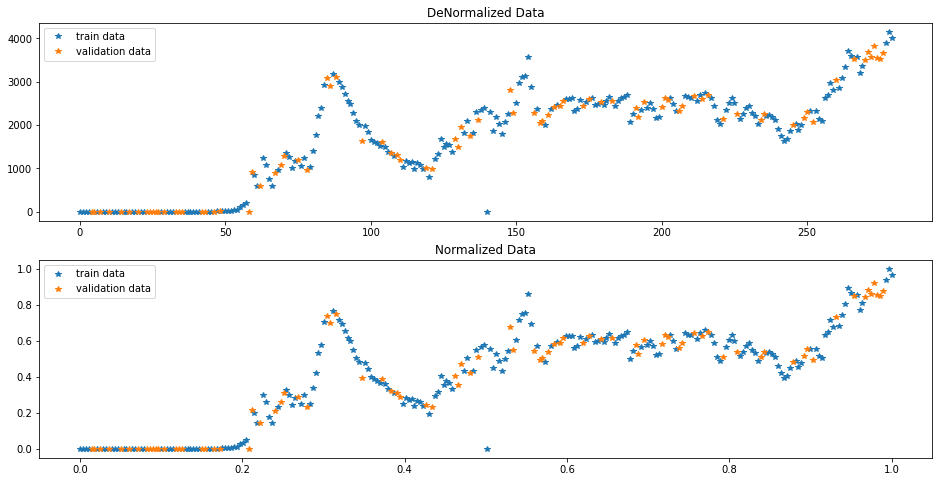

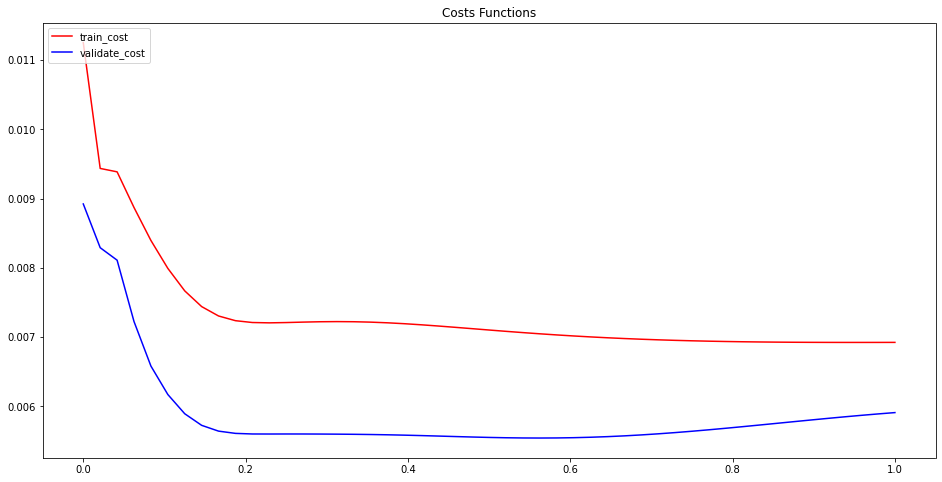

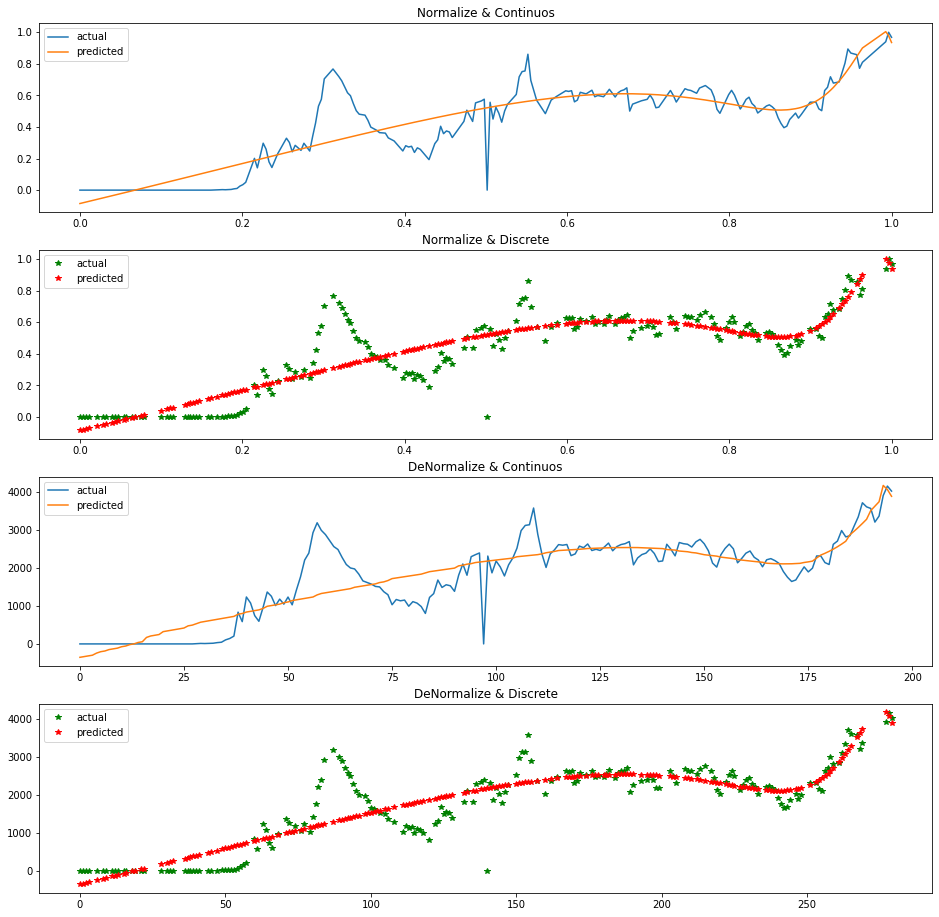

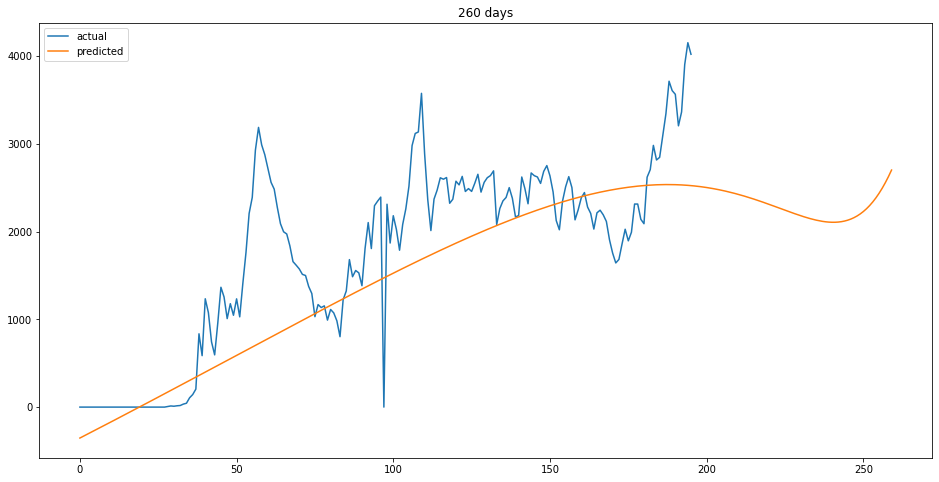

In [ ]:
if __name__ == "__main__":
    main()